<a href="https://colab.research.google.com/github/w2k31984/tripleten_Bootcamp_DS/blob/master/02_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos (EDA)

---



Una de las tareas más comúnes en análisis y ciencia de datos es el análisis exploratorio de datos. En esta etapa, buscamos familiarizarnos más con los datos y empezar a contestar preguntas que sean de nuestro interés.

Una estrategia recomendada para realizar un análisis exploratorio es:
1. Entender estadísticas sencillas de los datos (número de filas, número de columnas, valores nulos, etc.).
2. Entender la distribución de cada columna (histogramas y conteos por columnas).
3. Entender tendencias en el tiempo (si es que las hay) e identificar si tenemos más datos para periodos más recientes.
4. Entender la correlación entre diferentes variables. Ahondar en la correlación entre nuestras variables más importantes
5. Conclusiones y recomendaciones para futuros análisis.

En esta práctica simularemos cómo se ve un día de trabajo de un analista y científico de datos. Tomaremos datos sobre las canciones navideñas más populares desde 1958 según Billboard. Nos pondremos el sombrero de creadores de contenido encontrando canciones que puedan llegar a ser muy populares para usarlas en un anuncio.

Pueden leer más acerca de los datos en las siguientes ligas:
- [Billboard Top 100 Christmas Carol Dataset](https://www.kaggle.com/datasets/sharkbait1223/billboard-top-100-christmas-carol-dataset/)
- [Billboard Hot weekly charts](https://data.world/kcmillersean/billboard-hot-100-1958-2017)

Los datos los puedes descargar desde aquí:
- [christmas_billboard_data.csv](https://drive.google.com/file/d/1uDsTeUOXmyuhRbQ_5tveNHN3sTWtYG0B/view?usp=sharing)


In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
url = 'https://raw.githubusercontent.com/HectorLira/data-science-projects/master/datasets/christmas_billboard_data.csv'
carols = pd.read_csv(url)

In [3]:
carols.head()

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,year,month,day
0,http://www.billboard.com/charts/hot-100/1958-1...,12/13/1958,83,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,NaN,69,3,1958,12,13
1,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,57,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1,NaN,29,19,1958,12,20
2,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,73,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,83.0,69,3,1958,12,20
3,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,86,WHITE CHRISTMAS,Bing Crosby,White ChristmasBing Crosby,1,NaN,12,13,1958,12,20
4,http://www.billboard.com/charts/hot-100/1958-1...,12/27/1958,44,GREEN CHRI$TMA$,Stan Freberg,Green Chri$tma$Stan Freberg,1,NaN,44,2,1958,12,27


In [4]:
carols.shape

(387, 13)

## Estadísticas sencillas de los datos

In [5]:
carols.head(5)

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,year,month,day
0,http://www.billboard.com/charts/hot-100/1958-1...,12/13/1958,83,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,NaN,69,3,1958,12,13
1,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,57,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1,NaN,29,19,1958,12,20
2,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,73,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,83.0,69,3,1958,12,20
3,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,86,WHITE CHRISTMAS,Bing Crosby,White ChristmasBing Crosby,1,NaN,12,13,1958,12,20
4,http://www.billboard.com/charts/hot-100/1958-1...,12/27/1958,44,GREEN CHRI$TMA$,Stan Freberg,Green Chri$tma$Stan Freberg,1,NaN,44,2,1958,12,27


In [6]:
carols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   url                     387 non-null    object 
 1   weekid                  387 non-null    object 
 2   week_position           387 non-null    int64  
 3   song                    387 non-null    object 
 4   performer               387 non-null    object 
 5   songid                  387 non-null    object 
 6   instance                387 non-null    int64  
 7   previous_week_position  279 non-null    float64
 8   peak_position           387 non-null    int64  
 9   weeks_on_chart          387 non-null    int64  
 10  year                    387 non-null    int64  
 11  month                   387 non-null    int64  
 12  day                     387 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 39.4+ KB


### Preprocesamiento de datos

In [7]:
carols["week"] = pd.to_datetime(carols["weekid"]).dt.to_period("W-MON").dt.start_time.dt.strftime('%Y-%m-%d')
carols["month_date"] = pd.to_datetime(carols["weekid"]).dt.to_period("M").dt.start_time.dt.strftime('%Y-%m-%d')

In [9]:
carols.head(5)

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart,year,month,day,week,month_date
0,http://www.billboard.com/charts/hot-100/1958-1...,12/13/1958,83,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,NaN,69,3,1958,12,13,1958-12-09,1958-12-01
1,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,57,JINGLE BELL ROCK,Bobby Helms,Jingle Bell RockBobby Helms,1,NaN,29,19,1958,12,20,1958-12-16,1958-12-01
2,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,73,RUN RUDOLPH RUN,Chuck Berry,Run Rudolph RunChuck Berry,1,83.0,69,3,1958,12,20,1958-12-16,1958-12-01
3,http://www.billboard.com/charts/hot-100/1958-1...,12/20/1958,86,WHITE CHRISTMAS,Bing Crosby,White ChristmasBing Crosby,1,NaN,12,13,1958,12,20,1958-12-16,1958-12-01
4,http://www.billboard.com/charts/hot-100/1958-1...,12/27/1958,44,GREEN CHRI$TMA$,Stan Freberg,Green Chri$tma$Stan Freberg,1,NaN,44,2,1958,12,27,1958-12-23,1958-12-01


## Valores por columna

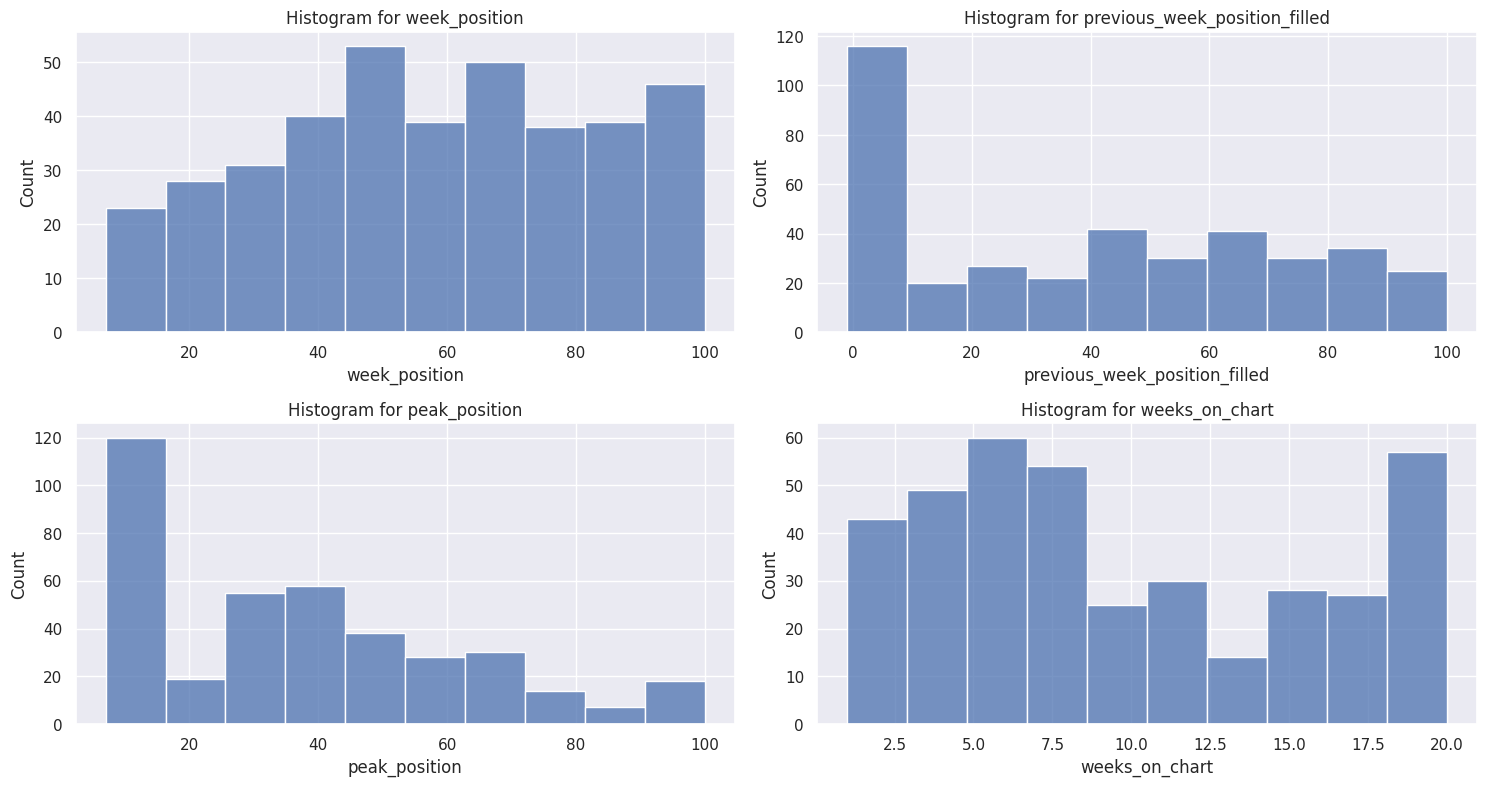

In [10]:
carols["previous_week_position_filled"] = carols["previous_week_position"].fillna(-1)

hist_cols = [
    "week_position",
    "previous_week_position_filled",
    "peak_position",
    "weeks_on_chart"
]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))

for col, ax in zip(hist_cols, axes.flatten()):

  ax.set_title(f"Histogram for {col}")
  sns.histplot(x=carols[col], ax=ax)

fig.tight_layout(pad=1.0)

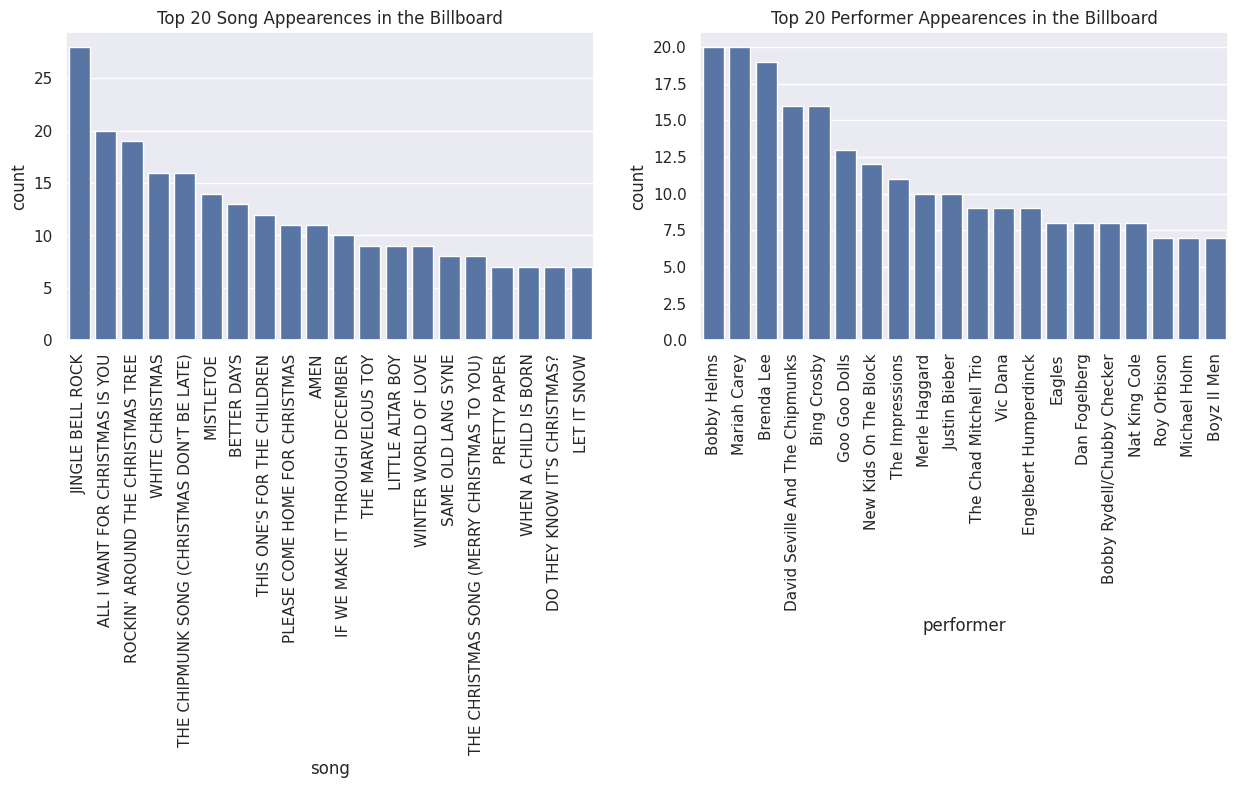

In [11]:
top_20_songs = carols["song"].value_counts().index[:20]
top_20_performers = carols["performer"].value_counts().index[:20]

fig, ax = plt.subplots(ncols=2, figsize=(15, 4))

top_songs = carols[carols["song"].isin(top_20_songs)]
top_performers = carols[carols["performer"].isin(top_20_performers)]

ax[0].set_title("Top 20 Song Appearences in the Billboard")
sns.countplot(data=top_songs, x="song", ax=ax[0], order=top_songs["song"].value_counts().index)
ax[0].tick_params(rotation=90, axis="x")

ax[1].set_title("Top 20 Performer Appearences in the Billboard")
sns.countplot(data=top_performers, x="performer", ax=ax[1], order=top_performers["performer"].value_counts().index)
ax[1].tick_params(rotation=90, axis="x")

plt.show()

## Tendencias a través del tiempo

In [12]:
month_range = pd.date_range(
    carols["month_date"].min(),
    carols["month_date"].max(),
    freq='MS').strftime("%Y-%m-%d").tolist()

filled_carols = pd.DataFrame(data={
    "month_date": month_range
})
filled_carols["month_date"] = pd.to_datetime(filled_carols["month_date"])

carols["month_date"] = pd.to_datetime(carols["month_date"])
songs_by_month = carols.groupby("month_date").size().reset_index().rename(columns={0: "songs"})

filled_carols = pd.merge(
    filled_carols,
    songs_by_month,
    on="month_date",
    how="left"
)

filled_carols["songs"].fillna(0, inplace=True)

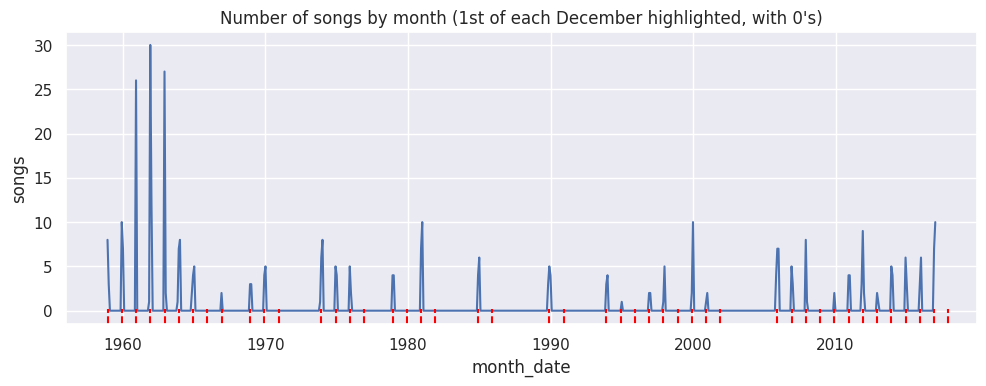

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.set_title("Number of songs by month (1st of each December highlighted, with 0's)")
sns.lineplot(data=filled_carols, x="month_date", y="songs", ax=ax)

for year in carols["year"].unique():
  ax.axvline(x=dt.datetime(year, 12, 1), ymax=0.05, color="red", ls="--")

fig.tight_layout(pad=1.0)

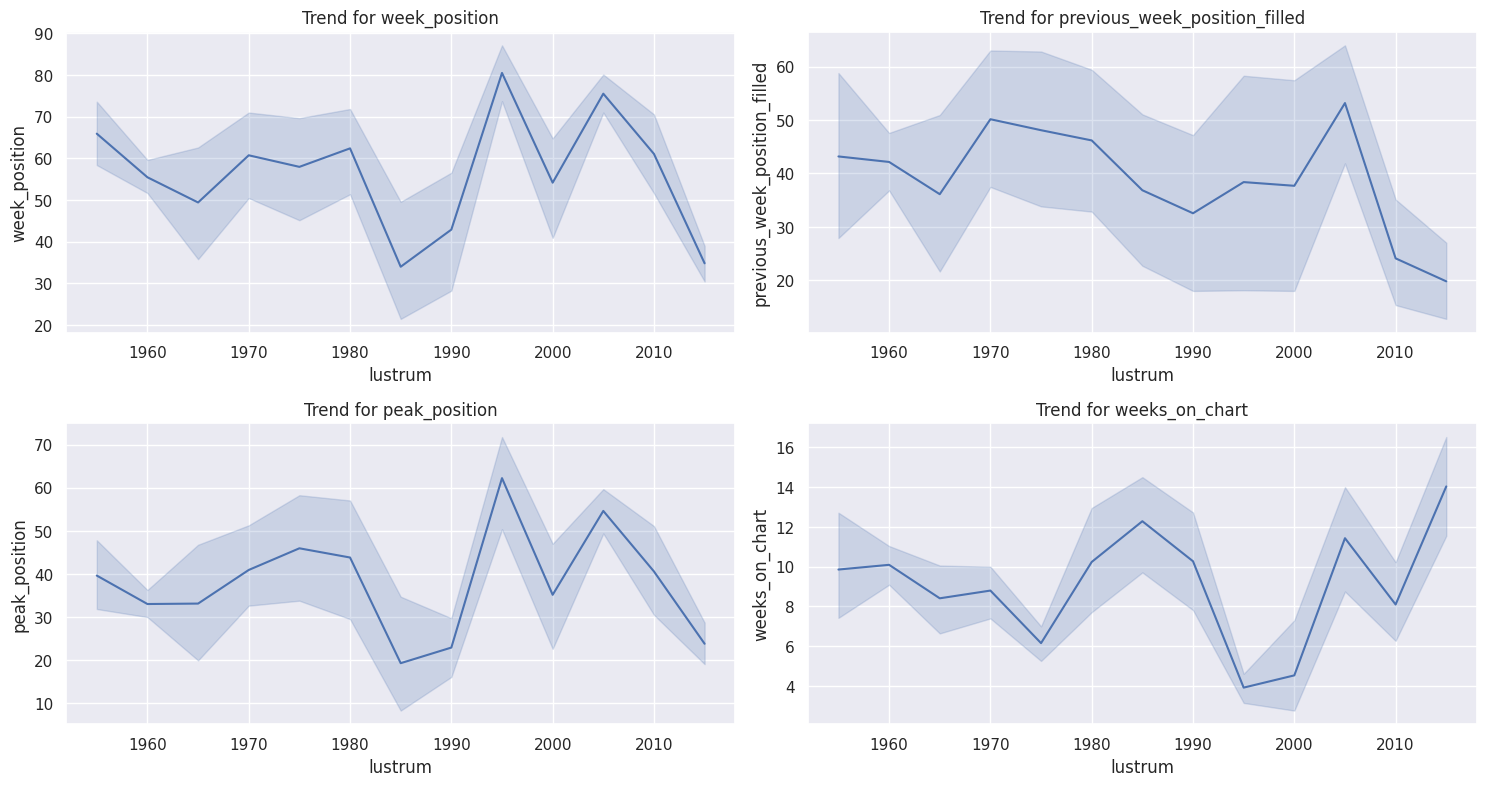

In [14]:
carols["lustrum"] = np.floor(carols["year"] / 5) * 5

trend_cols = [
    "week_position",
    "previous_week_position_filled",
    "peak_position",
    "weeks_on_chart"
]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))

for col, ax in zip(hist_cols, axes.flatten()):

  ax.set_title(f"Trend for {col}")
  sns.lineplot(data=carols, x="lustrum", y=col, ax=ax)

fig.tight_layout(pad=1.0)

## Correlación entre variables

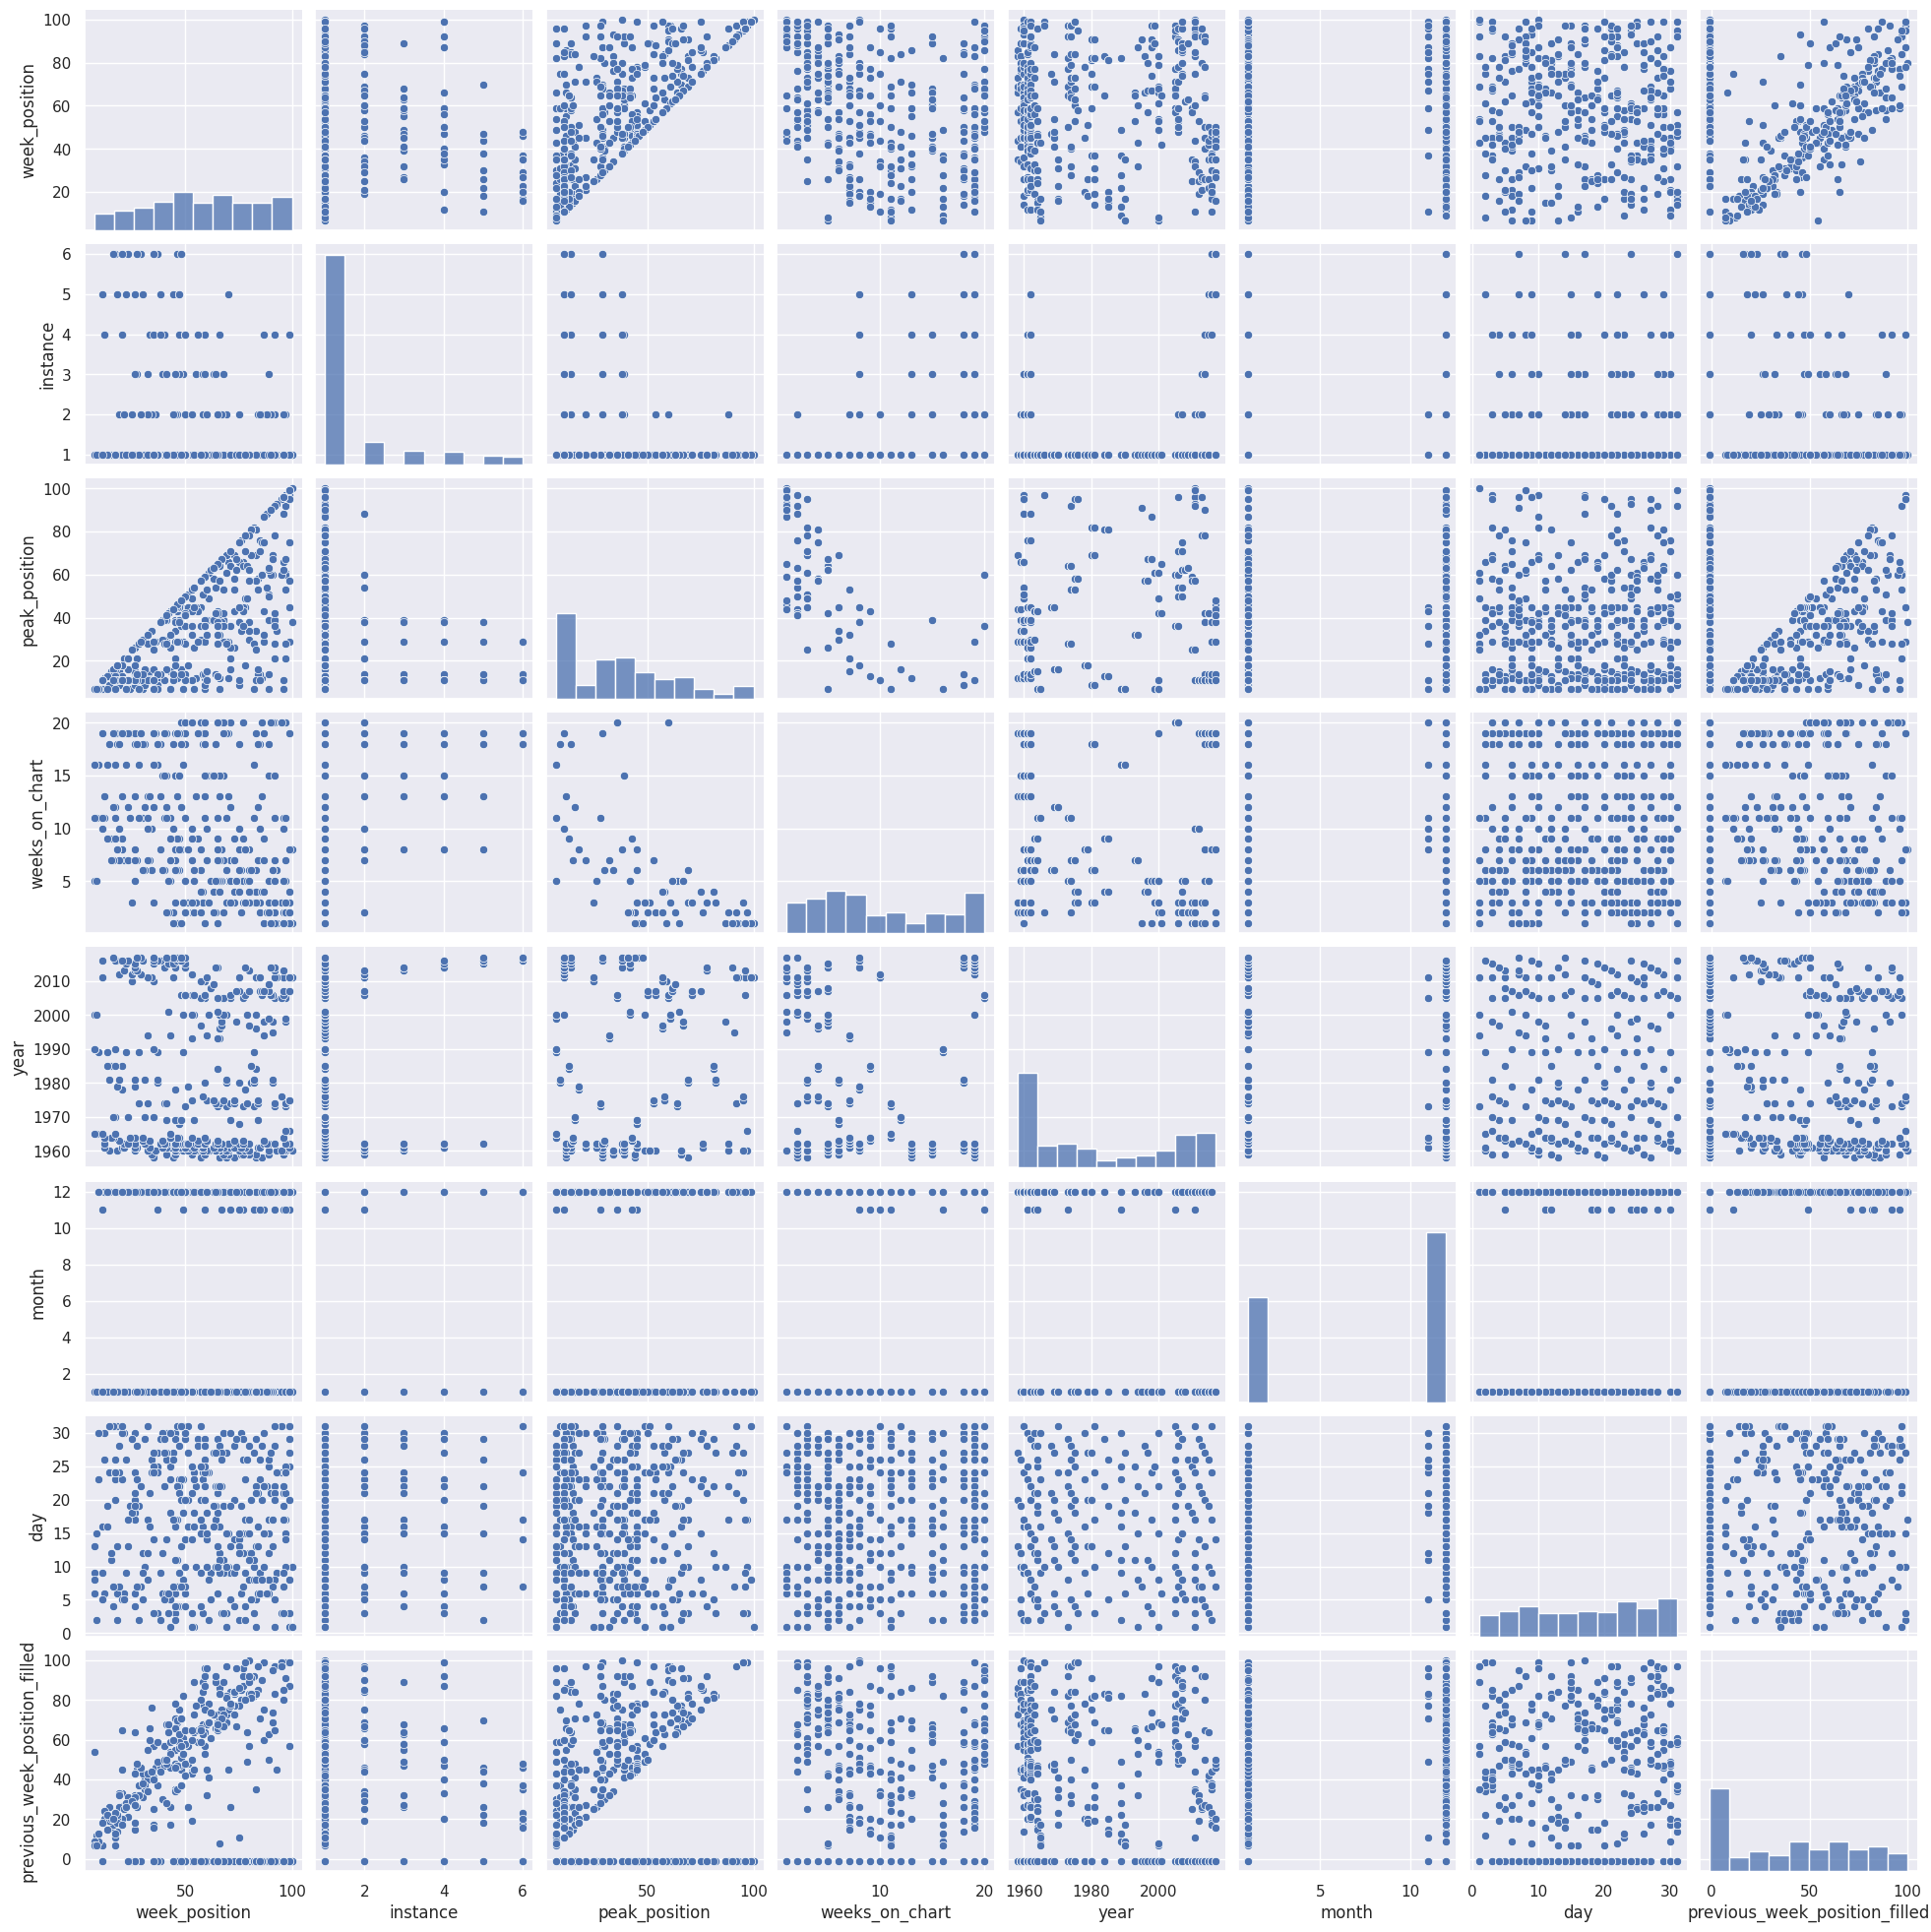

CPU times: user 21.1 s, sys: 437 ms, total: 21.5 s
Wall time: 21.6 s


In [15]:
%%time
cols_to_drop = [
    "lustrum",
    "previous_week_position"
]

sns.pairplot(carols.drop(columns=cols_to_drop),
             height=2.5, aspect=1)
plt.show()

Algunas relaciones interesantes son:

- La posición que ocupa una canción navideña en el Billboard está muy asociada con la posición que tenía la semana pasada.
- Parece haber una relación negativa entre la máxima posición que alcanza una canción navideña y la cantidad de semanas que aparece dentro del Billboard.

# Conclusiones y futuros análisis


In [16]:
carols.columns

Index(['url', 'weekid', 'week_position', 'song', 'performer', 'songid',
       'instance', 'previous_week_position', 'peak_position', 'weeks_on_chart',
       'year', 'month', 'day', 'week', 'month_date',
       'previous_week_position_filled', 'lustrum'],
      dtype='object')

In [17]:
carols.query("year > 2010")["songid"].unique()

array(["Baby, It's Cold OutsideGlee Cast", 'Christmas LightsColdplay',
       'Oh Santa!Mariah Carey', 'Shake Up ChristmasTrain',
       'MistletoeJustin Bieber',
       "It's Beginning To Look A Lot Like ChristmasMichael Buble",
       "I'll Be Home For ChristmasKelly Clarkson",
       "Do They Know It's Christmas?Glee Cast",
       'All I Want For Christmas Is YouMichael Buble',
       'All I Want For Christmas Is YouMariah Carey',
       'Last ChristmasAriana Grande', 'Underneath The TreeKelly Clarkson',
       'The Christmas Song (Merry Christmas To You)Nat King Cole',
       "Rockin' Around The Christmas TreeBrenda Lee",
       'Santa Tell MeAriana Grande',
       'Have Yourself A Merry Little ChristmasSam Smith',
       'Jingle Bell RockBobby Helms', 'Last ChristmasWham!',
       'A Holly Jolly ChristmasBurl Ives', 'Feliz NavidadJose Feliciano',
       "It's The Most Wonderful Time Of The YearAndy Williams"],
      dtype=object)

In [18]:
carols.query("(year < 2000) and (year > 1980)")["songid"].unique()

array(['What Can You Get A Wookiee For Christmas (When He Already Owns A Comb?)The Star Wars Intergalactic Droid Choir & Chorale',
       'Merry Christmas In The NFLWillis "The Guard" & Vigorish',
       'Same Old Lang SyneDan Fogelberg',
       'The Greatest Gift Of AllKenny Rogers',
       "Do They Know It's Christmas?Band-Aid",
       "This One's For The ChildrenNew Kids On The Block",
       'Let It SnowBoyz II Men', 'The Santa Claus BoogieThe Tractors',
       'Macarena ChristmasLos Del Rio',
       "Santa's A Fat BitchInsane Clown Posse",
       'Grandma Got Run Over By A ReindeerElmo & Patsy',
       'Auld Lang SyneKenny G', 'Deck The HallsSHeDAISY'], dtype=object)

In [19]:
carols.query("(year < 1980) and (year >= 1970) and (weeks_on_chart > 10)")["songid"].unique()

array(['Winter World Of LoveEngelbert Humperdinck',
       'If We Make It Through DecemberMerle Haggard'], dtype=object)

In [20]:
carols.query("(song == 'ALL I WANT FOR CHRISTMAS IS YOU')")["songid"].unique()

array(['All I Want For Christmas Is YouMariah Carey',
       'All I Want For Christmas Is YouMichael Buble'], dtype=object)

In [21]:
carols.query("peak_position <= 7")["songid"].unique()

array(['AmenThe Impressions',
       "This One's For The ChildrenNew Kids On The Block",
       'Auld Lang SyneKenny G'], dtype=object)

In [22]:
carols.query("(peak_position <= 20) and (year > 1990)")["songid"].unique()

array(['Auld Lang SyneKenny G',
       'All I Want For Christmas Is YouMariah Carey',
       'MistletoeJustin Bieber',
       "Rockin' Around The Christmas TreeBrenda Lee"], dtype=object)

# Tarea

Para su tarea deberán encontrar una canción que les parezca interesante y quieran utilizar en un anuncio de marketing. Los criterios que pueden utilizar son:
- Fue un éxito reciente y alcanzó un nivel de popularidad alto.
- Es un clásico y alcanzó un nivel de popularidad alto en su momento.
- Es de un periodo de tiempo que consideran "la era dorada" de las canciones navideñas.
- Mantuvo una racha muy alta de veces que apareció en el Billboard.
- Alguna combinación de los criterios mencionados.

Podrán realizar la tarea en Excel, Python o abriendo el archivo .csv y viendo todos los datos. Al día siguiente repasaremos las tareas y discutiremos ideas para encontrar ¡la mejor canción navideña!

In [26]:
import pandas as pd
top_5_songs = carols["song"].value_counts().index[:5]
top_5_performers = carols["performer"].value_counts().index[:5]


top_songs = carols[carols["song"].isin(top_5_songs)]
top_performers = carols[carols["performer"].isin(top_5_performers)]


# Mostrar canciones candidatas
print(top_5_songs)

Index(['JINGLE BELL ROCK', 'ALL I WANT FOR CHRISTMAS IS YOU',
       'ROCKIN' AROUND THE CHRISTMAS TREE', 'WHITE CHRISTMAS',
       'THE CHIPMUNK SONG (CHRISTMAS DON'T BE LATE)'],
      dtype='object', name='song')


In [27]:
#Cambiamos el criterio a 20 canciones por evaluar.
top_20_songs = carols["song"].value_counts().index[:20]
top_20_performers = carols["performer"].value_counts().index[:20]


top_songs = carols[carols["song"].isin(top_20_songs)]
top_performers = carols[carols["performer"].isin(top_20_performers)]


# Mostrar canciones candidatas
print(top_performers)

                                                   url      weekid  \
1    http://www.billboard.com/charts/hot-100/1958-1...  12/20/1958   
3    http://www.billboard.com/charts/hot-100/1958-1...  12/20/1958   
5    http://www.billboard.com/charts/hot-100/1958-1...  12/27/1958   
7    http://www.billboard.com/charts/hot-100/1958-1...  12/27/1958   
8    http://www.billboard.com/charts/hot-100/1959-0...    1/3/1959   
..                                                 ...         ...   
377  http://www.billboard.com/charts/hot-100/2017-0...    1/7/2017   
380  http://www.billboard.com/charts/hot-100/2017-0...    1/7/2017   
382  http://www.billboard.com/charts/hot-100/2017-0...    1/7/2017   
383  http://www.billboard.com/charts/hot-100/2017-0...    1/7/2017   
385  http://www.billboard.com/charts/hot-100/2017-0...   1/14/2017   

     week_position                                         song  \
1               57                             JINGLE BELL ROCK   
3               86       

**Criterios a responder**
*   Fue un éxito reciente y alcanzó un nivel de popularidad alto.  
  **JINGLE BELL ROCK**
*   Es un clásico y alcanzó un nivel de popularidad alto en su momento.

  **Bobby Helms-Jingle Bell Rock**

*   Es de un periodo de tiempo que consideran "la era dorada" de las canciones navideñas. **Años: 1955 y 2015**
*   Mantuvo una racha muy alta de veces que apareció en el Billboard.

   **'Mariah Carey-All I Want For Christmas Is You'**
  
* Mantuvo una racha muy alta de veces que apareció en el Billboard.

  **'Mariah Carey-All I Want For Christmas Is You'**

* Alguna combinación de los criterios mencionados.

  **Mariah Carey- All I Want For Christmas Is You**

  **Brenda Lee- Rockin' Around The Christmas Tree**   

